[![Open in GitHub Codespaces](https://github.com/codespaces/badge.svg)](https://codespaces.new/swiftsoftwaregroup/tropess-notes-python) [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/swiftsoftwaregroup/tropess-notes-python/blob/main/book/data-analysis-ozone-plot-column-vcd.ipynb) [![Open in SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github/swiftsoftwaregroup/tropess-notes-python/blob/main/book/data-analysis-ozone-plot-column-vcd.ipynb) 

# Ozone Column (O3 VCD)

Plot the column variable `col` in Dobson Units. The O3 column is a pre-calculated vertical column density (VCD) of Ozone from the surface to the Top of Atmosphere (TOA).

Ozone concentrations retrieved from [CrIS JPSS-1](https://www.nesdis.noaa.gov/current-satellite-missions/currently-flying/joint-polar-satellite-system/cross-track-infrared) global observations.

## Import packages

In [19]:
import numpy as np
from netCDF4 import Dataset

import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

## Read data variables

In [20]:
# Open the netCDF file
dataset = Dataset('./data/TROPESS_CrIS-JPSS1_L2_Summary_O3_20230516_MUSES_R1p20_FS_F0p6.nc', 'r')

# Read the data from your variables
latitude = dataset.variables['latitude'][:]
longitude = dataset.variables['longitude'][:]

# Native `col` units are `mol m-2`
col_var = dataset.variables['col']
col = col_var[:]

# Convert to Dobson Units (DU)
col_du = col * col_var.for_dobson_units_multiply_by

dataset.close()

## Create plots

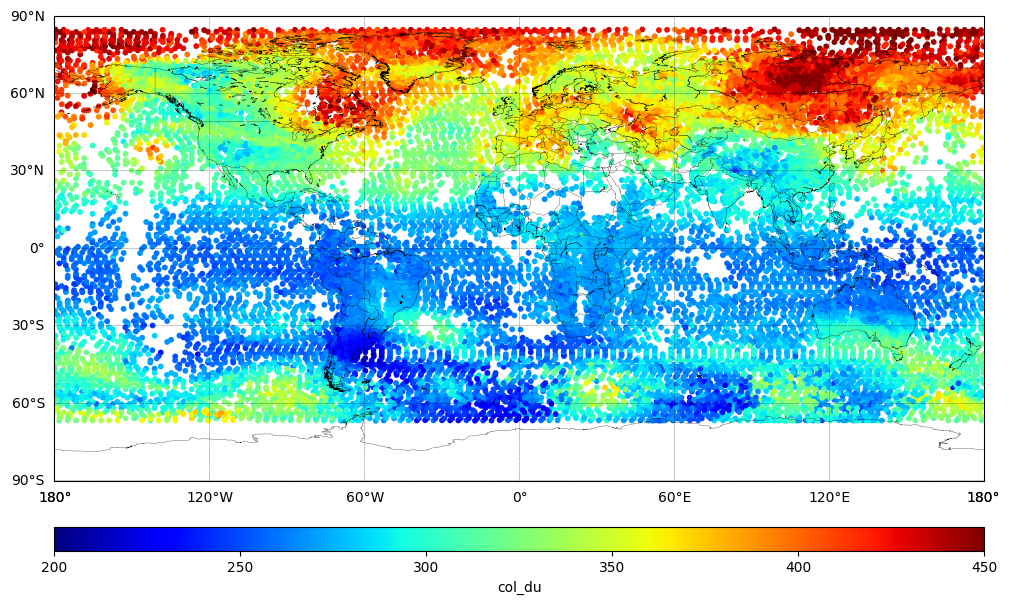

In [21]:
# Specify figure size (in inches)
plt.figure(figsize=(12, 8))  

# Create a basemap instance
m = Basemap(projection='cyl', resolution='l', 
            llcrnrlat=-90, urcrnrlat=90,  # set latitude limits to -90 and 90
            llcrnrlon=-180, urcrnrlon=180)  # set longitude limits to -180 and 180

m.drawcoastlines(linewidth=0.2)
m.drawcountries(linewidth=0.2)

# Draw parallels (latitude lines) and meridians (longitude lines)
parallels = np.arange(-90., 91., 30.)
m.drawparallels(parallels, labels=[True,False,False,False], linewidth=0.3)

meridians = np.arange(-180., 181., 60.)
m.drawmeridians(meridians, labels=[False,False,False,True], linewidth=0.3)    

# Standard catter plot
# Transform lat and lon to map projection coordinates
x, y = m(longitude, latitude)

# Plot the data using scatter (you may want to choose a different colormap and normalization)
sc = m.scatter(x, y, c=col_du, cmap='jet', s=10, vmin=200.0, vmax=450.0)

# Add a colorbar
cbar = m.colorbar(sc, location='bottom', pad="10%")
cbar.set_label('col_du')

plt.show()